In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Pokemon.xlsx')
types = df['Type 1']
df = df.drop(columns=['Type 1', 'Type 2', 'Name', 'Generation'])
df['Legendary'] = df['Legendary'].replace({False: 0, True: 1})

In [3]:
types_unique = types.unique()
for i in range(len(types)):
    types[i] = np.where(types_unique == types[i])[0][0]
print(types)

0       0
1       0
2       0
3       0
4       1
       ..
795    11
796    11
797    10
798    10
799     1
Name: Type 1, Length: 800, dtype: object


In [4]:
columns = df.columns
for i in columns:
    if i != 'Legendary' and i != '#':
        df[i] = (df[i] - df[i].mean()) / df[i].std()

In [5]:
df.head()
X = df.drop(columns=['#', 'Legendary']).values
Y = df['Legendary'].values

In [6]:
mean = np.mean(X)
X = X - mean

cov = np.cov(X.T)

eigenvalues, eigenvectors  = np.linalg.eig(cov)
eigenvectors = eigenvectors.T

print(eigenvalues)

inds = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[inds]
eigenvectors = eigenvectors[inds]

for i in eigenvalues_sorted:
    print("PC" + str(np.where(eigenvalues == i)[0][0] + 1), columns[np.where(eigenvalues == i)[0][0] + 1])
    print(i/np.sum(eigenvalues_sorted) * 100 , "% of total variance")

components = eigenvectors[:4]
X_transformed = np.dot(X, components.T)

[3.70947218e+00 5.80663028e-17 1.09361080e+00 2.67459498e-01
 4.28560131e-01 7.22103732e-01 7.78793659e-01]
PC1 Total
52.99245977182794 % of total variance
PC3 Attack
15.623011367406155 % of total variance
PC7 Speed
11.125623701640038 % of total variance
PC6 Sp. Def
10.315767604756989 % of total variance
PC5 Sp. Atk
6.122287586158066 % of total variance
PC4 Defense
3.8208499682108017 % of total variance
PC2 HP
8.295186112452838e-16 % of total variance


In [7]:
print(components.shape)

(4, 7)


In [8]:
print(eigenvectors.shape)

(7, 7)


In [9]:
import matplotlib.pyplot as plt

X axis: PC1Total, Y axis: PC1Total


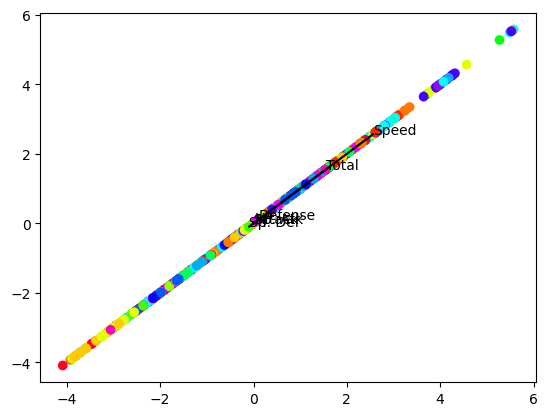

X axis: PC1Total, Y axis: PC3Attack


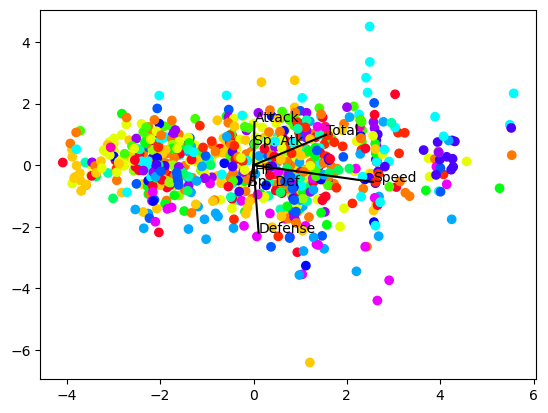

X axis: PC1Total, Y axis: PC7Speed


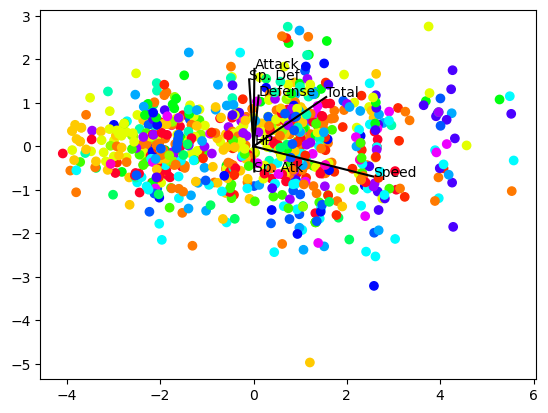

X axis: PC1Total, Y axis: PC6Sp. Def


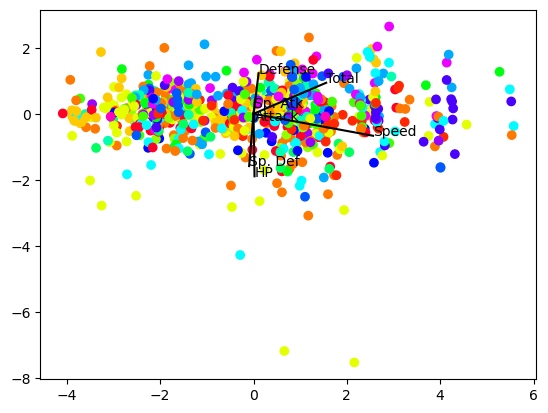

X axis: PC3Attack, Y axis: PC1Total


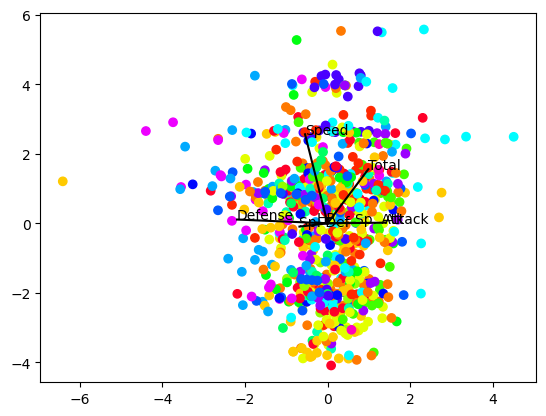

X axis: PC3Attack, Y axis: PC3Attack


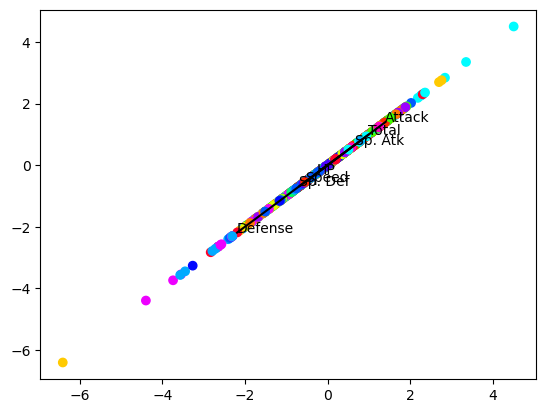

X axis: PC3Attack, Y axis: PC7Speed


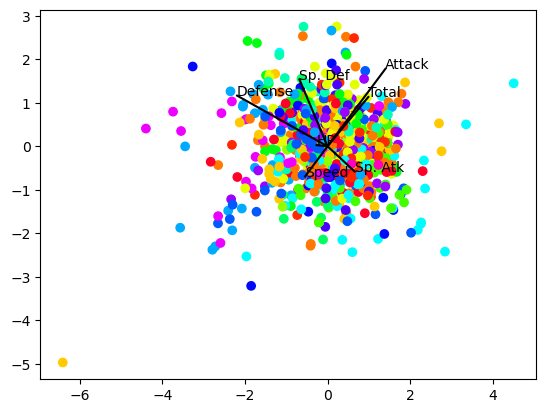

X axis: PC3Attack, Y axis: PC6Sp. Def


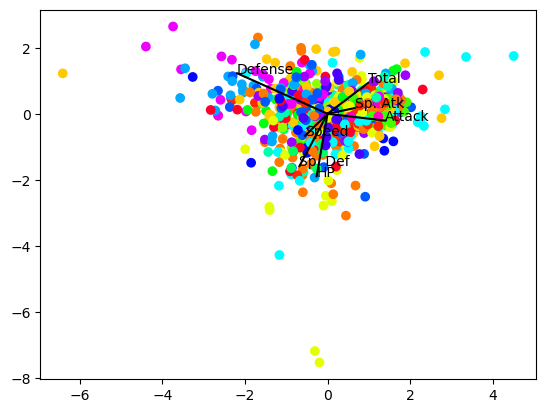

X axis: PC7Speed, Y axis: PC1Total


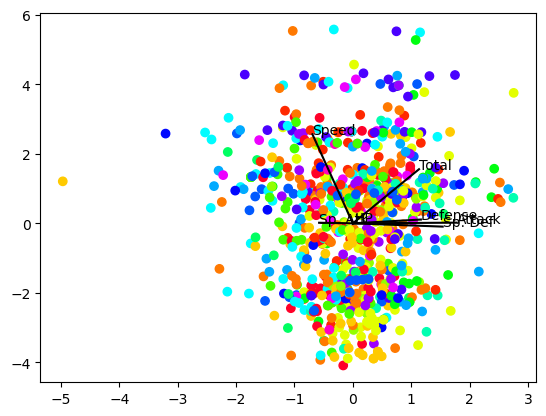

X axis: PC7Speed, Y axis: PC3Attack


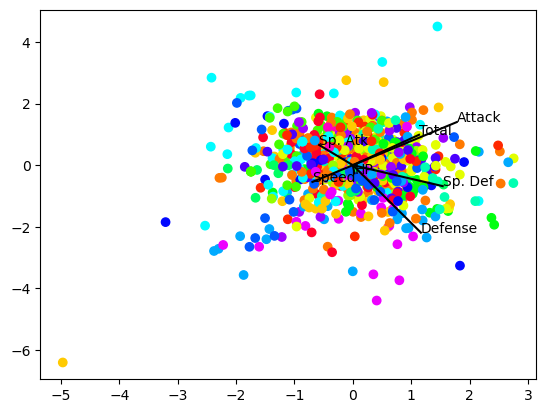

X axis: PC7Speed, Y axis: PC7Speed


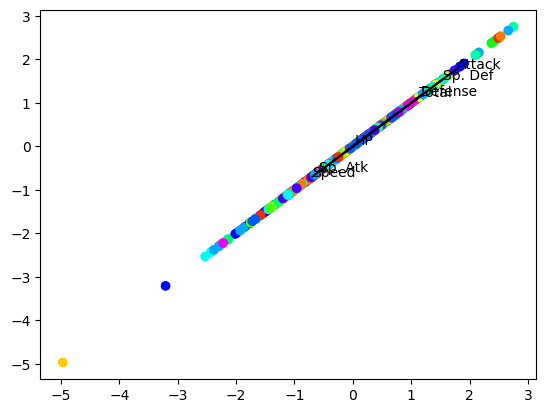

X axis: PC7Speed, Y axis: PC6Sp. Def


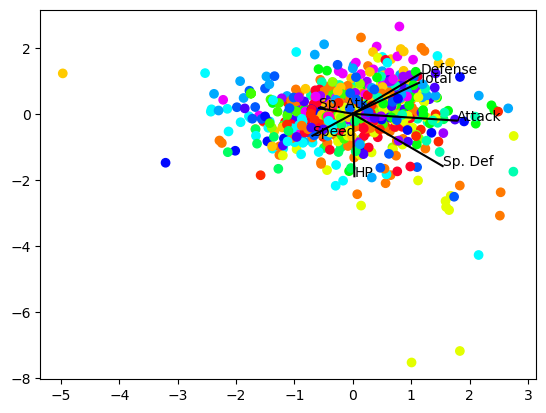

X axis: PC6Sp. Def, Y axis: PC1Total


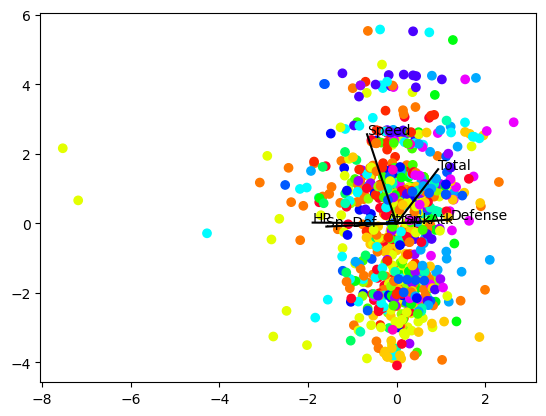

X axis: PC6Sp. Def, Y axis: PC3Attack


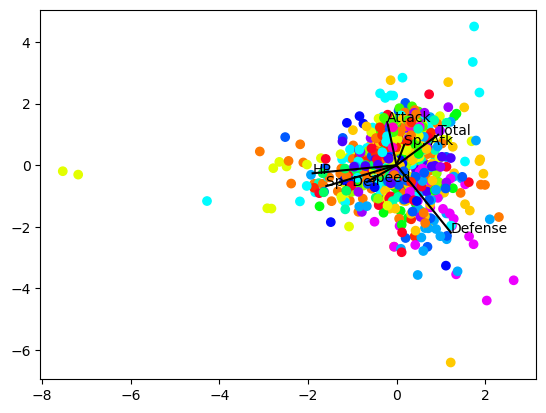

X axis: PC6Sp. Def, Y axis: PC7Speed


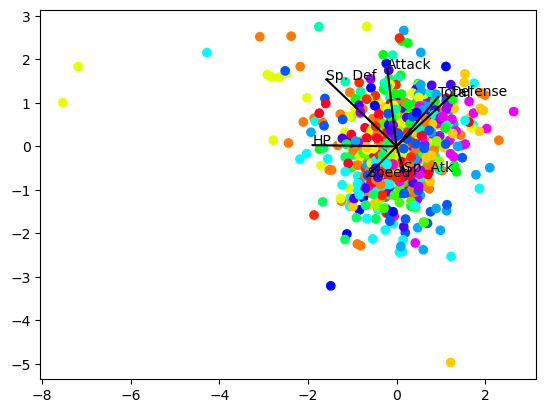

X axis: PC6Sp. Def, Y axis: PC6Sp. Def


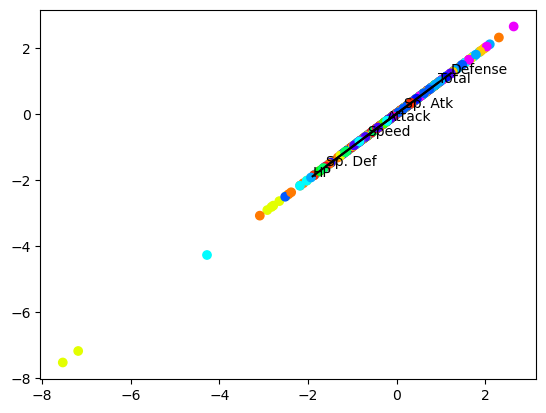

In [10]:
for i in range(4):
    istring = "PC" + str(np.where(eigenvalues == eigenvalues_sorted[i])[0][0] + 1) + columns[np.where(eigenvalues == eigenvalues_sorted[i])[0][0] + 1]
    for j in range(4):
        jstring = "PC" + str(np.where(eigenvalues == eigenvalues_sorted[j])[0][0] + 1) + columns[np.where(eigenvalues == eigenvalues_sorted[j])[0][0] + 1]
        plt.scatter(X_transformed[:, i], X_transformed[:, j], c=types, cmap='gist_rainbow')
        for k in range(len(columns) - 2):
            plt.plot([0, eigenvectors[k][i] * 3] , [0, eigenvectors[k][j] * 3], color='black', label = columns[k+1])
            plt.text(eigenvectors[k][i]*3, eigenvectors[k][j]*3, columns[k+1], fontsize=10)
        print("X axis: " + istring + ", Y axis: " + jstring)
        plt.show()
